In [53]:
%matplotlib inline
import plotly.express as px
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sb

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')



In [54]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)



In [55]:
data = pd.read_csv('Peliculas.csv')
print(data.shape)
data.dropna()
data.head()

(5113, 24)


,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,monto_ganancia,codigo_director
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.0
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.0
2,2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,3.0
3,3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,4.0
4,4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,5.0


In [45]:
fig = px.scatter(data, x="codigo_director", y="runtime", color="revenue", hover_data=['director'])
                # size='runtime', hover_data=['director'])
fig.show()

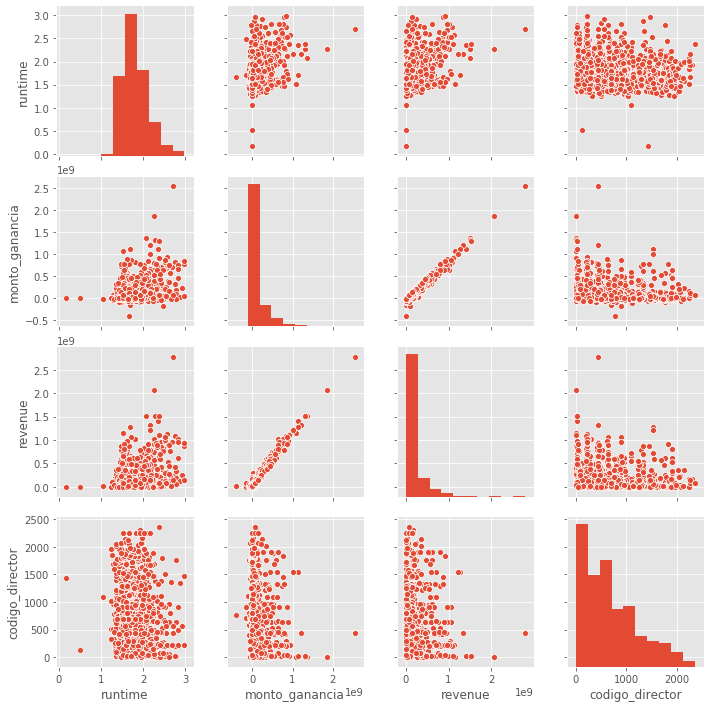

In [69]:
sb.pairplot(data.dropna(),vars=["runtime","monto_ganancia","revenue","codigo_director"])

In [76]:
X = np.array(data[["runtime"]])
y = np.array(data['monto_ganancia'])

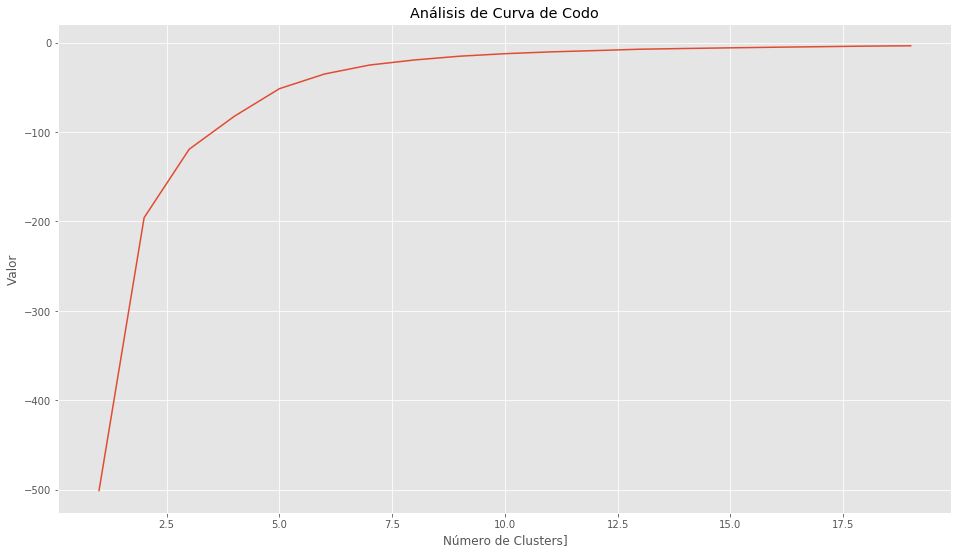

In [77]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, init = 'k-means++', random_state = 42) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Número de Clusters]')
plt.ylabel('Valor')
plt.title('Análisis de Curva de Codo')
plt.show()

In [82]:
num_clusters = 5

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
print(centroids)

[[1.73525424]
 [2.4700831 ]
 [2.04209833]
 [1.48983529]
 [0.3236    ]]


In [88]:
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in y_kmeans:
    asignar.append(colores[row])

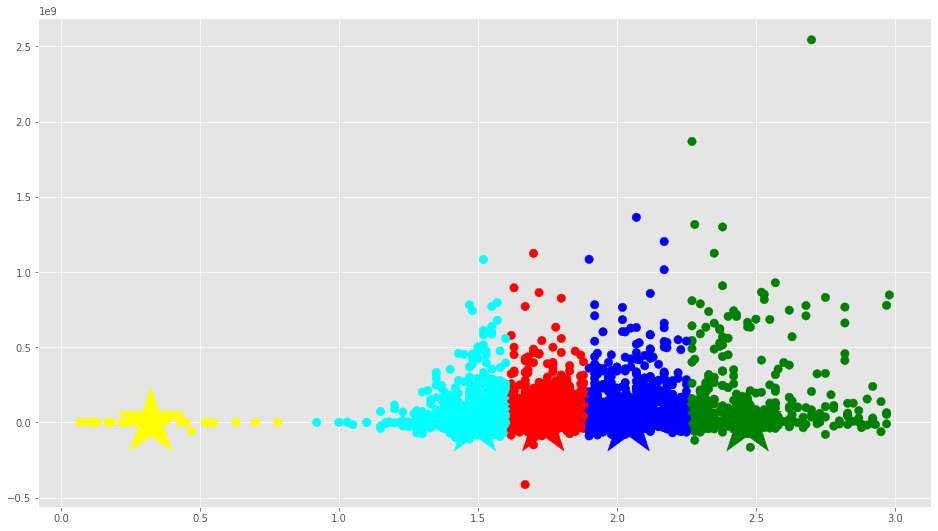

In [90]:
# Getting the values and plotting it
f1 = data['runtime'].values
f2 = data['monto_ganancia'].values

colores=['red','green','blue','cyan','yellow']

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(centroids[:, 0], centroids[:, 0], marker='*', c=colores, s=5000)
plt.show()